In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from resnet import *
from train import train, test
from dataset import *
from batchnorm import BatchNorm, CustomBatchNorm2d

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)


In [10]:
# model.eval()

In [11]:
# resnet18
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)

In [12]:
# print('customized batchnorm test')
# print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)
# train(model, trainloader, valloader)
# correct, total = test(model, testloader)
# print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

In [13]:
model = resnet18(pretrained=False)
initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])

norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()


In [14]:
# initial_state

In [15]:
# model = resnet18(pretrained=False, norm_layer=CustomBatchNorm2d).to(device)
# initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])
    

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss 0.0651 val loss 0.0567 train acc 20.52 val acc 29.20 lr 0.1000
Epoch 2 of 32
train loss 0.0485 val loss 0.0487 train acc 33.31 val acc 36.88 lr 0.1000
Epoch 3 of 32
train loss 0.0430 val loss 0.0433 train acc 38.27 val acc 40.83 lr 0.1000
Epoch 4 of 32
train loss 0.0389 val loss 0.0395 train acc 42.43 val acc 45.33 lr 0.1000
Epoch 5 of 32
train loss 0.0348 val loss 0.0374 train acc 47.21 val acc 47.97 lr 0.1000
Epoch 6 of 32
train loss 0.0312 val loss 0.0377 train acc 51.98 val acc 47.75 lr 0.1000
Epoch 7 of 32
train loss 0.0283 val loss 0.0405 train acc 54.68 val acc 45.88 lr 0.1000
Epoch 8 of 32
train loss 0.0246 val loss 0.0332 train acc 60.14 val acc 51.37 lr 0.1000
Epoch 9 of 32
train loss 0.0180 val loss 0.0243 train acc 70.43 val acc 62.24 lr 0.0100
Epoch 10 of 32
train loss 0.0155 val loss 0.0244 train acc 74.21 val acc 62.46 lr 0.0100
Epoch 11 of 32
train loss 0.0146 val loss 0.0245 train acc 75.35 val acc 62.68 lr 0.0100
Epoch 12 of 32
train loss 0.0135 val loss 0.

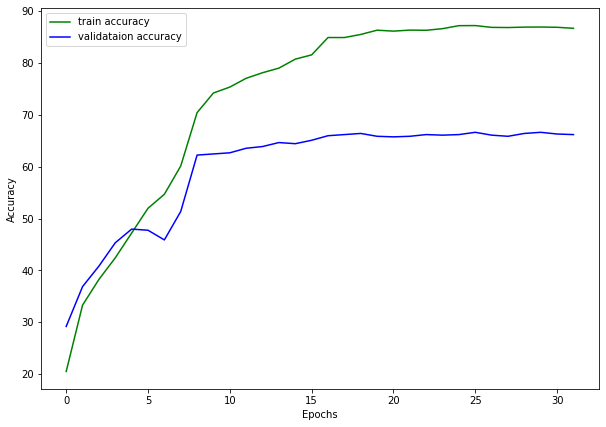

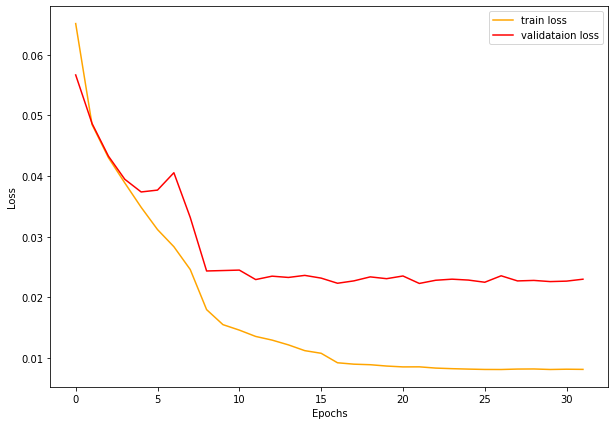

In [16]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0604 val loss 0.0497 train acc 22.66 val acc 33.92 lr 0.1000
Epoch 2 of 32
train loss 0.0448 val loss 0.0449 train acc 36.72 val acc 39.30 lr 0.1000
Epoch 3 of 32
train loss 0.0392 val loss 0.0424 train acc 42.91 val acc 43.14 lr 0.1000
Epoch 4 of 32
train loss 0.0351 val loss 0.0380 train acc 46.96 val acc 44.02 lr 0.1000
Epoch 5 of 32
train loss 0.0310 val loss 0.0362 train acc 52.40 val acc 47.53 lr 0.1000
Epoch 6 of 32
train loss 0.0272 val loss 0.0378 train acc 57.06 val ac

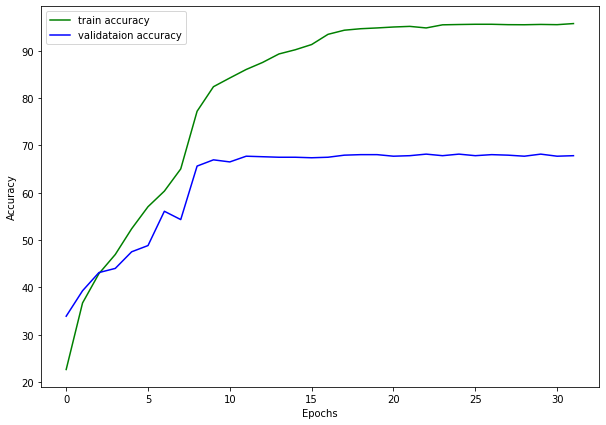

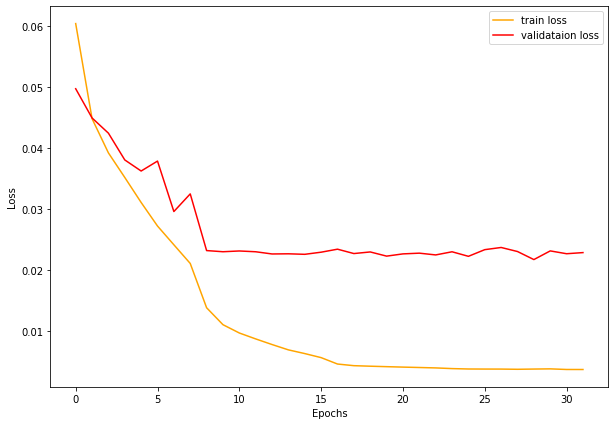

In [17]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized batchnorm test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0637 val loss 0.0531 train acc 21.03 val acc 32.16 lr 0.1000
Epoch 2 of 32
train loss 0.0456 val loss 0.0449 train acc 36.14 val acc 37.98 lr 0.1000
Epoch 3 of 32
train loss 0.0399 val loss 0.0426 train acc 42.07 val acc 40.50 lr 0.1000
Epoch 4 of 32
train loss 0.0355 val loss 0.0391 train acc 46.99 val acc 46.10 lr 0.1000
Epoch 5 of 32
train loss 0.0325 val loss 0.0361 train acc 50.49 val acc 48.52 lr 0.1000
Epoch 6 of 32
train loss 0.0294 val loss 0.0

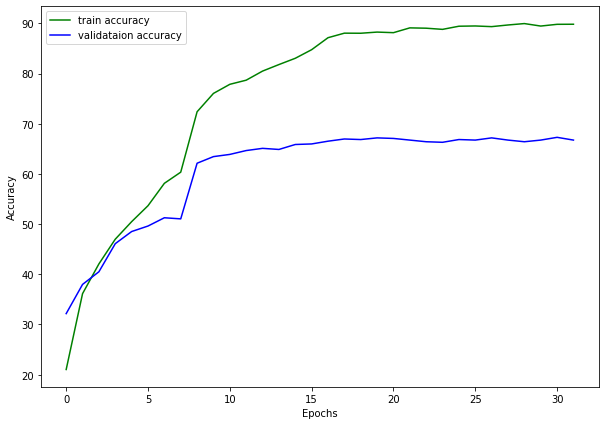

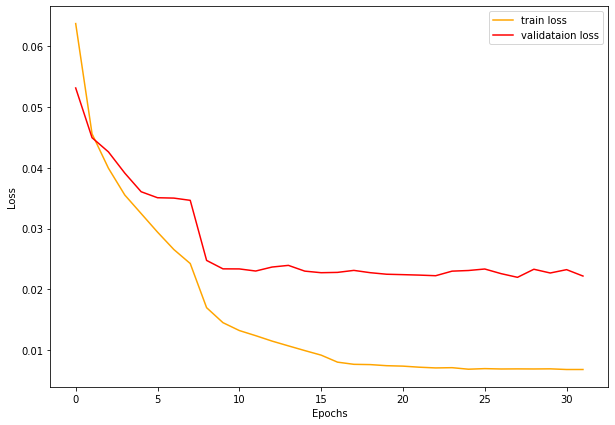

In [18]:
print('customized batchnorm test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized batchnorm test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0684 val loss 0.0552 train acc 18.43 val acc 25.36 lr 0.1000
Epoch 2 of 32
train loss 0.0489 val loss 0.0571 train acc 32.50 val acc 27.33 lr 0.1000
Epoch 3 of 32
train loss 0.0432 val loss 0.0443 train acc 38.91 val acc 41.71 lr 0.1000
Epoch 4 of 32
train loss 0.0390 val loss 0.0396 train acc 42.93 val acc 44.24 lr 0.1000
Epoch 5 of 32
train loss 0.0350 val loss 0.0383 train acc 47.69 val acc 46.21 lr 0.1000
Epoch 6 of 32
train loss 0.0318 val loss 0.0

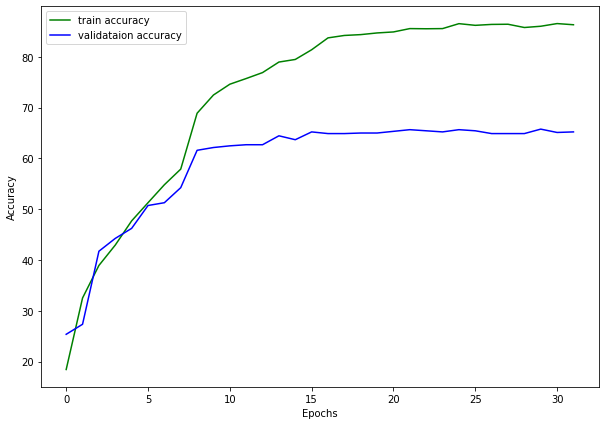

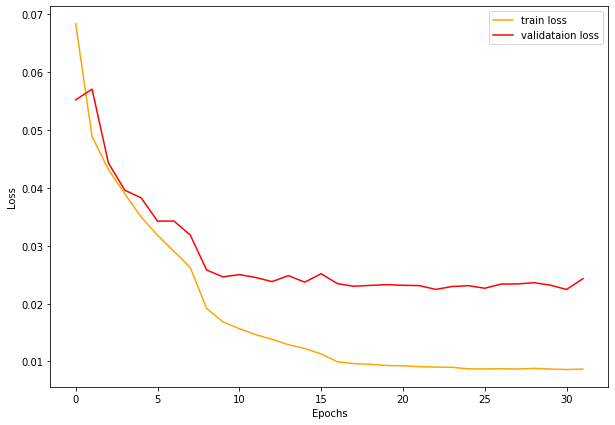

In [19]:
print('customized batchnorm test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))